In [1]:
import json

cate = ['Mexican', 'Fast Food', 'Pizza', 'American (Traditional)', 'Sandwiches', 
        'Breakfast & Brunch', 'Chinese', 'Italian']

fullcate = []
file = open("./business.json",'r')
content = []
for line in file:
    content.append(json.loads(line))

for item in content:
    if(item["city"] == "Las Vegas"):
        if((item['categories'] not in fullcate)&('Restaurants' in item['categories'])):
            fullcate.append(item['categories'])
#         if any(j in cate for j in item['categories']):
#             data.append(item)
# print(data[0])
# print(len(data))
print(len(fullcate))


3598


In [2]:
uniquecate = []
for i in range(len(fullcate)):
    for item in fullcate[i]:
        if item not in uniquecate:
            uniquecate.append(item)
print(len(uniquecate))
print(uniquecate)
#['Mexican', 'Fast Food', 'Pizza','American (Traditional)', 
#'Sandwiches', 'Breakfast & Brunch', 'Chinese', 'Italian'
#'Cafes', 'Sandwiches', 'Sandwiches', 'Bars',
#'Chicken Wings', 'Hot Dogs', 'Burgers', 'Seafood'
#'Jazz & Blues','Korean', 'Donuts', 'Hot Pot']

390
['Nightlife', 'Bars', 'Barbeque', 'Sports Bars', 'American (New)', 'Restaurants', 'Fast Food', 'Sandwiches', 'Arcades', 'Arts & Entertainment', 'Gastropubs', 'Italian', 'Burgers', 'Cafes', 'Wine Bars', 'American (Traditional)', 'Seafood', 'Pizza', 'Karaoke', 'Mexican', 'Dance Clubs', 'Thai', 'Food', 'Coffee & Tea', 'Salad', 'Breakfast & Brunch', 'Chinese', 'Specialty Food', 'Candy Stores', 'Ice Cream & Frozen Yogurt', 'Pubs', 'Irish', 'Japanese', 'Delis', 'Shaved Ice', 'Hot Dogs', 'Creperies', 'Buffets', 'Event Planning & Services', 'Caterers', 'Greek', 'Middle Eastern', 'Mediterranean', 'Breweries', 'Hawaiian', 'Asian Fusion', 'Korean', 'Casinos', 'Chicken Shop', 'Chicken Wings', 'Diners', 'Desserts', 'Sushi Bars', 'Lounges', 'Cuban', 'Food Trucks', 'Music Venues', 'Persian/Iranian', 'Cocktail Bars', 'Steakhouses', 'Filipino', 'Tex-Mex', 'Beer Bar', 'Bakeries', 'Tapas Bars', 'Donuts', 'Soup', 'Street Vendors', 'Poke', 'Irish Pub', 'Vietnamese', 'Do-It-Yourself Food', 'Hot Pot', 'F

In [3]:
data = []
for item in content:
    if(item["city"] == "Las Vegas"):
        if any(label in uniquecate for label in item['categories'])&('Restaurants' in item['categories']):
            data.append(item)
print("there are", len(data), "restaurants in Las Vegas.")
print(data[1])

import json

with open('data.json', 'w') as fp:
    for item in data:
        json.dump(item, fp)
        fp.write('\n')

there are 5899 restaurants in Las Vegas.
{'business_id': '4srfPk1s8nlm1YusyDUbjg', 'name': 'Subway', 'neighborhood': 'Southeast', 'address': '6889 S Eastern Ave, Ste 101', 'city': 'Las Vegas', 'state': 'NV', 'postal_code': '89119', 'latitude': 36.0646523, 'longitude': -115.1189541, 'stars': 2.5, 'review_count': 6, 'is_open': 1, 'attributes': {'GoodForMeal': {'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}, 'Alcohol': 'none', 'HasTV': False, 'RestaurantsGoodForGroups': True, 'RestaurantsAttire': 'casual', 'RestaurantsReservations': False, 'OutdoorSeating': False, 'BusinessAcceptsCreditCards': True, 'RestaurantsPriceRange2': 1, 'BikeParking': False, 'RestaurantsDelivery': False, 'Ambience': {'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'divey': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}, 'RestaurantsTakeOut': True, 'GoodForKids': True, 'DriveThru': False, 'BusinessPa

In [4]:
ll = []
for row in data:
    temp = []
    temp.append(row['latitude'])
    temp.append(row['longitude'])
    ll.append(temp)
print(ll[0])

[36.0669136, -115.1708484]


## K-means++

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import seaborn as sns
%matplotlib inline

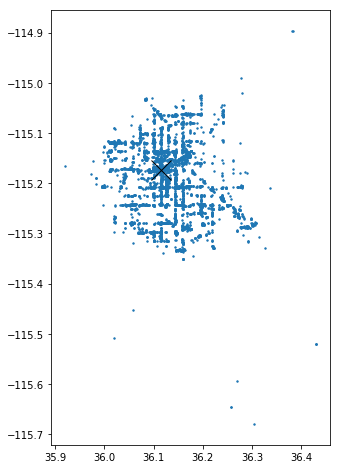

In [6]:
X = np.asarray(ll)
plt.figure(figsize = (5,8))
_ = plt.scatter(X[:,0],X[:,1],s = 2)
plt.plot([36.114647], [-115.172813], marker="x", markersize=20, color="black", label="downtown")

In [7]:
from sklearn.cluster import KMeans
k=8
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
labels = kmeans.fit_predict(X)
print(len(labels))

5899


Text(0,0.5,'longitude')

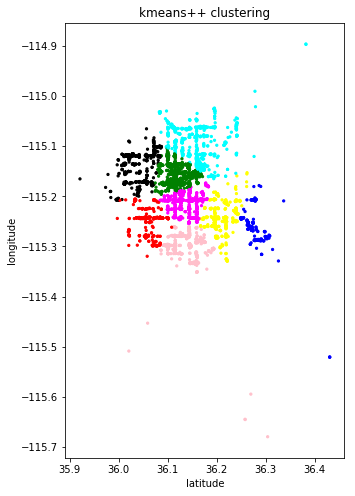

In [8]:
colors = [['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink'][p] for p in labels]
plt.figure(figsize = (5, 8))
plt.scatter(X[:, 0], X[:, 1], color = colors, s = 5)
plt.title('kmeans++ clustering')
plt.xlabel('latitude')
plt.ylabel('longitude')

In [9]:
average_rate = {}
colorname = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink']
for c in range(8):
    rate_sum = 0
    rest_count = 0
    for i in range(len(labels)):
        if(labels[i]==c):
            rate_sum = rate_sum + data[i]['stars']
            rest_count +=1
            average_rate[colorname[c]] = rate_sum/rest_count
            
print(average_rate)

{'blue': 3.341304347826087, 'green': 3.3526654950205037, 'red': 3.5573979591836733, 'cyan': 3.4453032104637336, 'magenta': 3.584428715874621, 'yellow': 3.3634408602150536, 'black': 3.515833333333333, 'pink': 3.551111111111111}


178


Text(36.1146,-115.183,'downtown')

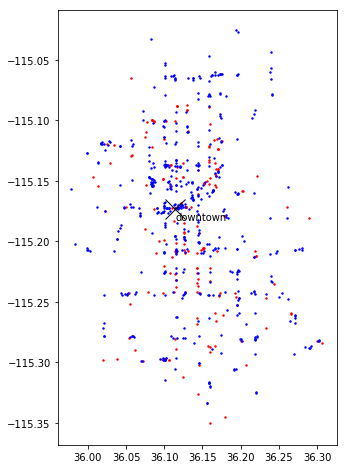

In [10]:
best = []
bestll = []
worst = []
worstll = []

for item in data:
    temp = []
    if(item['stars']>=5):
        best.append(item)
        temp.append(item['latitude'])
        temp.append(item['longitude'])
        bestll.append(temp)
        

for item in data:
    temp = []
    if(item['stars']<=2.0):
        worst.append(item)
        temp.append(item['latitude'])
        temp.append(item['longitude'])
        worstll.append(temp)


print(len(bestll))
X = np.asarray(bestll)
Y = np.asarray(worstll)
plt.figure(figsize = (5,8))
_ = plt.scatter(X[:,0], X[:,1], color = 'r', s = 2)
_ = plt.scatter(Y[:,0], Y[:,1], color = 'b', s = 2)

plt.plot([36.114647], [-115.172813], marker="x", markersize=20, color="black", label = "downtown")
plt.text(36.114647, -115.182813,r'downtown')

In [52]:
#now devide according to the distance to downtown point.
nearest = []
near_stars = []
def distance(x,y):
    dist = ((x-36.114647)**2 + (y+115.182813)**2)**0.5
    return dist


def relat_l_s(r1,r2):
    for item in data:
        temp = []
        x = item['latitude']
        y = item['longitude']
        if(r1<distance(x,y)<r2):
            temp.append(item['latitude'])
            temp.append(item['longitude'])
            nearest.append(temp)
            near_stars.append(item['stars'])
    ave_star = sum(near_stars)/(len(near_stars))
    return ave_star


relate = {}
r1 = 0.02
for r2 in np.arange(0.04, 0.15, 0.0005):
    relate[r2] = relat_l_s(r1,r2)
    r1 = r2

# X = np.asarray(nearest)
# plt.figure(figsize = (5,5))
# _ = plt.scatter(X[:,0], X[:,1], color = 'r', s = 2)
# print(ave_star)
print(relate)

{0.04: 3.518331226295828, 0.0405: 3.521144278606965, 0.041: 3.517747858017136, 0.0415: 3.510856453558504, 0.042: 3.506563245823389, 0.0425: 3.50401376146789, 0.043000000000000003: 3.5062217194570136, 0.043500000000000004: 3.519913885898816, 0.044000000000000004: 3.5105042016806722, 0.044500000000000005: 3.509733606557377, 0.045000000000000005: 3.502, 0.045500000000000006: 3.4995093228655545, 0.046000000000000006: 3.500965250965251, 0.04650000000000001: 3.4844606946983547, 0.04700000000000001: 3.487676056338028, 0.04750000000000001: 3.483599663582843, 0.04800000000000001: 3.483779399837794, 0.04850000000000001: 3.4864, 0.04900000000000001: 3.4907048799380327, 0.04950000000000001: 3.4898036253776437, 0.05000000000000001: 3.4861733931240657, 0.05050000000000001: 3.4829881656804735, 0.05100000000000001: 3.482443306510607, 0.05150000000000001: 3.4805755395683455, 0.05200000000000001: 3.4843304843304845, 0.05250000000000001: 3.4877365101611773, 0.05300000000000001: 3.4874389392882064, 0.0535

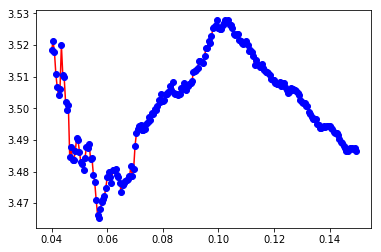

In [53]:
x = relate.keys()
y = relate.values()
fig, ax = plt.subplots( nrows=1, ncols=1 )
ax.plot(x,y,'r-')
ax.plot(x,y,'bo')

In [54]:
fig.savefig("location-star(0.15).jpg")